In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress

In [ ]:
# Read in CSV


In [2]:
# Focus on major fire incident: Read in csv file
major_fire_data = '../output_data/major_fire.csv'
major_fire_df = pd.read_csv(major_fire_data)
major_fire_df.head()

,AcresBurned,AirTankers,ArchiveYear,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Days Burned,...,Name,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,WaterTenders,Started Month
0,24251.0,NaN,2013,Ventura,56,47.0,8.0,117.0,5/11/13,9,...,Springs Fire,2167.0,5/2/13,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,11.0,5
1,20292.0,NaN,2013,Riverside,33,63.0,20.0,201.0,8/12/13,5,...,Silver Fire,2106.0,8/7/13,8.0,40.0,NaN,NaN,c400203b-a7fd-4bd8-803a-f3c74bc32a2b,20.0,8
2,11429.0,NaN,2013,Tehama,52,30.0,3.0,36.0,8/29/13,6,...,Deer Fire,898.0,8/23/13,NaN,NaN,NaN,NaN,956dbcf6-db40-4b61-b235-4ede14738f1e,8.0,8
3,8073.0,NaN,2013,Shasta,45,12.0,3.0,30.0,9/15/13,6,...,Clover Fire,342.0,9/9/13,10.0,201.0,NaN,NaN,92af9783-eda9-4186-afe9-447f61a92636,NaN,9
4,7055.0,NaN,2013,San Diego,37,56.0,24.0,183.0,7/15/13,9,...,Chariot Fire,2147.0,7/6/13,9.0,149.0,NaN,NaN,ee19b2ec-a96a-4738-994e-fb3ea016e053,24.0,7


In [3]:
# Duplicated data removed process
final_burned_df = major_fire_df.drop_duplicates(subset=['UniqueId', 'Days Burned','AcresBurned'])
final_burned_df.head()

,AcresBurned,AirTankers,ArchiveYear,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Days Burned,...,Name,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,WaterTenders,Started Month
0,24251.0,NaN,2013,Ventura,56,47.0,8.0,117.0,5/11/13,9,...,Springs Fire,2167.0,5/2/13,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,11.0,5
1,20292.0,NaN,2013,Riverside,33,63.0,20.0,201.0,8/12/13,5,...,Silver Fire,2106.0,8/7/13,8.0,40.0,NaN,NaN,c400203b-a7fd-4bd8-803a-f3c74bc32a2b,20.0,8
2,11429.0,NaN,2013,Tehama,52,30.0,3.0,36.0,8/29/13,6,...,Deer Fire,898.0,8/23/13,NaN,NaN,NaN,NaN,956dbcf6-db40-4b61-b235-4ede14738f1e,8.0,8
3,8073.0,NaN,2013,Shasta,45,12.0,3.0,30.0,9/15/13,6,...,Clover Fire,342.0,9/9/13,10.0,201.0,NaN,NaN,92af9783-eda9-4186-afe9-447f61a92636,NaN,9
4,7055.0,NaN,2013,San Diego,37,56.0,24.0,183.0,7/15/13,9,...,Chariot Fire,2147.0,7/6/13,9.0,149.0,NaN,NaN,ee19b2ec-a96a-4738-994e-fb3ea016e053,24.0,7


In [4]:
# Drop Null from column of interest (resources: personnel involved, dozers, engines, water tenders)
per_inv_df = final_burned_df.dropna(how='any', subset=['PersonnelInvolved'])
dozers_df = final_burned_df.dropna(how='any', subset=['Dozers'])
eng_df = final_burned_df.dropna(how='any', subset=['Engines'])
water_df = final_burned_df.dropna(how='any', subset=['WaterTenders'])

### Correlation between Final Size Burned (acres) vs Time Burned (days)

To find out that size burned area increases when time burned increases

The correlation between burned area (acres) and burned days is 0.17767
The r-squared is: 0.031565246


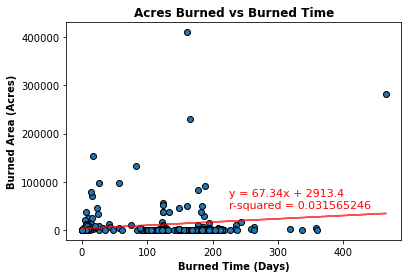

In [7]:
# Get data from dataframe to plot
area = final_burned_df.loc[final_burned_df['Days Burned']>=0, 'AcresBurned']
days = final_burned_df.loc[final_burned_df['Days Burned']>=0, 'Days Burned']

# Define x,y values
area_x_values = days
area_y_values = area

# Calculate the correlation
area_correlation = round(st.pearsonr(area_x_values, area_y_values)[0],5)
print(f"The correlation between burned area (acres) and burned days is {area_correlation}")

# Calculate linear regression values
(area_slope, area_intercept, area_rvalue, area_pvalue, area_stderr) = st.linregress(area_x_values, area_y_values)

# Calculate r-squared
area_r_squared = round(area_rvalue**2,9)
print(f"The r-squared is: {area_r_squared}")

# y = mx + b
area_regress_values = area_x_values * area_slope + area_intercept
area_line_eq = "y = " + str(round(area_slope,2)) + "x + " + str(round(area_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(area_x_values, area_y_values, edgecolors='black', color)
plt.plot(area_x_values,area_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(area_line_eq,(225,70000), fontsize=11, color="red")
plt.annotate(f'r-squared = {area_r_squared}', (225,45000), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Acres Burned vs Burned Time', fontweight='bold')
plt.xlabel('Burned Time (Days)', fontweight='bold')
plt.ylabel('Burned Area (Acres)', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('../Images/day_area.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

### Correlation between Resources vs Burned Time

To find out how many resources required to shorten burned time

#### Resources: Personnel Involved

In [17]:
# Get data from dataframe to plot
per_inv_t = per_inv_df.loc[per_inv_df['Days Burned']>=0, 'PersonnelInvolved']
pt_days = per_inv_df.loc[per_inv_df['Days Burned']>=0, 'Days Burned']

# Calculate the IQR and quantitatively
pt_quartiles = pt_days.quantile([0.25,0.5,0.75])
pt_lowerq = pt_quartiles[0.25]
pt_upperq = pt_quartiles[0.75]
pt_mean = pt_days.mean()
pt_iqr = pt_upperq-pt_lowerq    
pt_lower_bound = pt_lowerq - (1.5*pt_iqr)
pt_upper_bound = pt_upperq + (1.5*pt_iqr)

# Determine outliers using upper and lower bounds
pt_outliers = per_inv_t.loc[(per_inv_t < pt_lower_bound) | (per_inv_t > pt_upper_bound)]

# Print out the result
print(f'Personnel Involved outliers based on Burned Time')
print(f"Burned Time below {round(pt_lower_bound,2)} could be outliers.")
print(f"Burned Time above {round(pt_upper_bound,2)} could be outliers.")
print(f"Average Burned Time is: {round(pt_mean,2)}")
print(f"Number of outliers is: {pt_outliers.count()}")

Personnel Involved outliers based on Burned Time
Burned Time below -27.0 could be outliers.
Burned Time above 53.0 could be outliers.
Average Burned Time is: 45.33
Number of outliers is: 140


The correlation between burned time (days) and personnel involved is 0.05
The r-squared is: 0.0


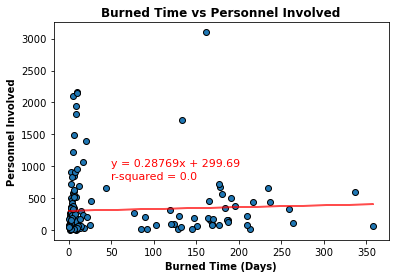

In [11]:
# Get data from dataframe to plot
per_inv_t = per_inv_df.loc[per_inv_df['Days Burned']>=0, 'PersonnelInvolved']
pt_days = per_inv_df.loc[per_inv_df['Days Burned']>=0, 'Days Burned']

# Define x, y values
pt_x_values = pt_days
pt_y_values = per_inv_t

# Calculate the correlation
pt_correlation = round(st.pearsonr(pt_x_values, pt_y_values)[0],2)
print(f"The correlation between burned time (days) and personnel involved is {pt_correlation}")

# Calculate linear regression values
(pt_slope, pt_intercept, pt_rvalue, pt_pvalue, pt_stderr) = st.linregress(pt_x_values, pt_y_values) 
                                                                                                   
# Calculate r-squared
pt_r_squared = round(pt_rvalue**2,2)
print(f"The r-squared is: {pt_r_squared}")

# y = mx + b
pt_regress_values = pt_x_values * pt_slope + pt_intercept
pt_line_eq = "y = " + str(round(pt_slope,5)) + "x + " + str(round(pt_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(pt_x_values, pt_y_values, edgecolors='black')
plt.plot(pt_x_values,pt_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(pt_line_eq,(50,1000), fontsize=11, color="red")
plt.annotate(f'r-squared = {pt_r_squared}', (50,800), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Burned Time vs Personnel Involved', fontweight='bold')
plt.xlabel('Burned Time (Days)', fontweight='bold')
plt.ylabel('Personnel Involved', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('../Images/time_perinv.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

#### Resources: Dozers

In [22]:
#Discover wheather dozers has relation to burned time
dozers_t = dozers_df.loc[dozers_df['Days Burned']>=0, 'Dozers']
dt_days = dozers_df.loc[dozers_df['Days Burned']>=0, 'Days Burned']

# Calculate the IQR and quantitatively
dt_quartiles = dt_days.quantile([0.25,0.5,0.75])
dt_lowerq = dt_quartiles[0.25]
dt_upperq = dt_quartiles[0.75]
dt_mean = dt_days.mean()
dt_iqr = dt_upperq-dt_lowerq    
dt_lower_bound = dt_lowerq - (1.5*dt_iqr)
dt_upper_bound = dt_upperq + (1.5*dt_iqr)

# Determine outliers using upper and lower bounds
dt_outliers = dozers_t.loc[(dozers_t < dt_lower_bound) | (dozers_t > dt_upper_bound)]

# Print out the result
print(f'Dozers outliers based on Burned Time')
print(f"Burned Time below {round(dt_lower_bound,2)} could be outliers.")
print(f"Burned Time above {round(dt_upper_bound,2)} could be outliers.")
print(f"Average Burned Time is: {round(dt_mean,2)}")
print(f"Number of outliers is: {dt_outliers.count()}")

Dozers outliers based on Burned Time
Burned Time below -19.38 could be outliers.
Burned Time above 37.62 could be outliers.
Average Burned Time is: 42.57
Number of outliers is: 2


The correlation between burned time (days) and dozers is -0.14
The r-squared is: 0.02


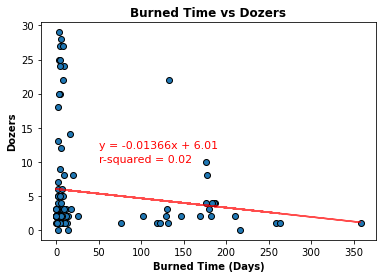

In [27]:
# Define x, y values
dt_x_values = dt_days.drop(dt_outliers.index)
dt_y_values = dozers_t.drop(dt_outliers.index)

# Calculate the correlation
dt_correlation = round(st.pearsonr(dt_x_values, dt_y_values)[0],2)
print(f"The correlation between burned time (days) and dozers is {dt_correlation}")

# Calculate linear regression values
(dt_slope, dt_intercept, dt_rvalue, dt_pvalue, dt_stderr) = st.linregress(dt_x_values, dt_y_values) 
                                                                                                   
# Calculate r-squared
dt_r_squared = round(dt_rvalue**2,2)
print(f"The r-squared is: {dt_r_squared}")

# y = mx + b
dt_regress_values = dt_x_values * dt_slope + dt_intercept
dt_line_eq = "y = " + str(round(dt_slope,5)) + "x + " + str(round(dt_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(dt_x_values, dt_y_values, edgecolors='black')
plt.plot(dt_x_values, dt_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(dt_line_eq,(50,12), fontsize=11, color="red")
plt.annotate(f'r-squared = {dt_r_squared}', (50,10), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Burned Time vs Dozers', fontweight='bold')
plt.xlabel('Burned Time (Days)', fontweight='bold')
plt.ylabel('Dozers', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('../Images/time_dozers.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

### Correlation between Resources vs Final Size Burned

To find out how many resources involved based on burned area

#### Resources: Personnel Involved

In [8]:
#Discover wheather personnel involved has relation to area burned
per_inv = per_inv_df['PersonnelInvolved']
area_pi = per_inv_df['AcresBurned']

# Calculate the IQR and quantitatively
pi_quartiles = area_pi.quantile([0.25,0.5,0.75])
pi_lowerq = pi_quartiles[0.25]
pi_upperq = pi_quartiles[0.75]
pi_mean = area_pi.mean()
pi_iqr = pi_upperq-pi_lowerq    
pi_lower_bound = pi_lowerq - (1.5*pi_iqr)
pi_upper_bound = pi_upperq + (1.5*pi_iqr)

# Determine outliers using upper and lower bounds
pi_outliers = area_pi.loc[(area_pi < pi_lower_bound) | (area_pi > pi_upper_bound)]

# Print out the result
print(f'Area burned outliers based on personel involved')
print(f"Final burned area (arces) below {round(pi_lower_bound,2)} could be outliers.")
print(f"Final burned area (arces) above {round(pi_upper_bound,2)} could be outliers.")
print(f"Average burned area is: {round(pi_mean,2)}")
print(f"Number of outliers is: {pi_outliers.count()}")

Area burned outliers based on personel involved
Final burned area (arces) below -4194.25 could be outliers.
Final burned area (arces) above 7293.75 could be outliers.
Average burned area is: 6009.79
Number of outliers is: 24


The correlation between burned area (acres) and personnel involved is 0.37
The r-squared is: 0.13


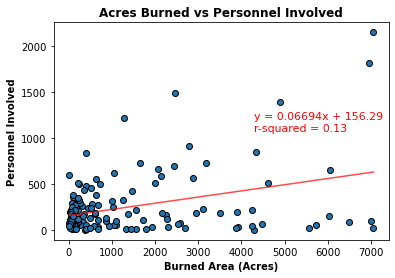

In [9]:
# Define x, y values
per_inv_x_values = area_pi.drop(pi_outliers.index)
per_inv_y_values = per_inv.drop(pi_outliers.index)

# Calculate the correlation
per_inv_correlation = round(st.pearsonr(per_inv_x_values, per_inv_y_values)[0],2)
print(f"The correlation between burned area (acres) and personnel involved is {per_inv_correlation}")

# Calculate linear regression values
(per_inv_slope, per_inv_intercept, per_inv_rvalue, per_inv_pvalue, per_inv_stderr) = st.linregress(per_inv_x_values, 
                                                                                                   per_inv_y_values)

# Calculate r-squared
per_inv_r_squared = round(per_inv_rvalue**2,2)
print(f"The r-squared is: {per_inv_r_squared}")

# y = mx + b
per_inv_regress_values = per_inv_x_values * per_inv_slope + per_inv_intercept
per_inv_line_eq = "y = " + str(round(per_inv_slope,5)) + "x + " + str(round(per_inv_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(per_inv_x_values, per_inv_y_values, edgecolors='black')
plt.plot(per_inv_x_values,per_inv_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(per_inv_line_eq,(4300,1200), fontsize=11, color="red")
plt.annotate(f'r-squared = {per_inv_r_squared}', (4300,1070), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Acres Burned vs Personnel Involved', fontweight='bold')
plt.xlabel('Burned Area (Acres)', fontweight='bold')
plt.ylabel('Personnel Involved', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('../Images/sized_perinv.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

#### Resources: Dozers

In [10]:
#Discover wheather dozers has relation to area burned
dozers = dozers_df['Dozers']
area_dz = dozers_df['AcresBurned']

# Calculate the IQR and quantitatively
dozers_quartiles = area_dz.quantile([0.25,0.5,0.75])
dozers_lowerq = dozers_quartiles[0.25]
dozers_upperq = dozers_quartiles[0.75]
dozers_mean = area_dz.mean()
dozers_iqr = dozers_upperq-dozers_lowerq    
dozers_lower_bound = dozers_lowerq - (1.5*dozers_iqr)
dozers_upper_bound = dozers_upperq + (1.5*dozers_iqr)

# Determine outliers using upper and lower bounds
dozers_outliers = area_dz.loc[(area_dz < dozers_lower_bound) | (area_dz > dozers_upper_bound)]

# Print out the result
print(f'Area burned outliers based on dozers involved')
print(f"Final burned area (arces) below {round(dozers_lower_bound,2)} could be outliers.")
print(f"Final burned area (arces) above {round(dozers_upper_bound,2)} could be outliers.")
print(f"Average burned area is: {round(dozers_mean,2)}")
print(f"Number of outliers is: {dozers_outliers.count()}")

Area burned outliers based on dozers involved
Final burned area (arces) below -4327.0 could be outliers.
Final burned area (arces) above 7507.0 could be outliers.
Average burned area is: 8197.18
Number of outliers is: 18


The correlation between burned area (acres) and number of dozers is 0.24
The r-squared is: 0.06


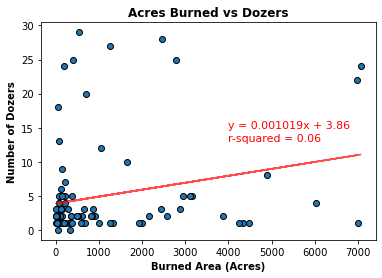

In [11]:
# Define x, y values
dozers_x_values = area_dz.drop(dozers_outliers.index)
dozers_y_values = dozers.drop(dozers_outliers.index)

# Calculate the correlation
dozers_correlation = round(st.pearsonr(dozers_x_values, dozers_y_values)[0],2)
print(f"The correlation between burned area (acres) and number of dozers is {dozers_correlation}")

# Calculate linear regression values
(dozers_slope, dozers_intercept, dozers_rvalue, dozers_pvalue, dozers_stderr) = st.linregress(dozers_x_values, 
                                                                                                   dozers_y_values)

# Calculate r-squared
dozers_r_squared = round(dozers_rvalue**2,2)
print(f"The r-squared is: {dozers_r_squared}")

# y = mx + b
dozers_regress_values = dozers_x_values * dozers_slope + dozers_intercept
dozers_line_eq = "y = " + str(round(dozers_slope,6)) + "x + " + str(round(dozers_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(dozers_x_values, dozers_y_values, edgecolors='black')
plt.plot(dozers_x_values, dozers_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(dozers_line_eq,(4000,15), fontsize=11, color="red")
plt.annotate(f'r-squared = {dozers_r_squared}', (4000,13), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Acres Burned vs Dozers', fontweight='bold')
plt.xlabel('Burned Area (Acres)', fontweight='bold')
plt.ylabel('Number of Dozers', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('../Images/sized_dozers.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

#### Resources: Engines

In [12]:
#Discover wheather engines has relation to area burned
engines = eng_df['Engines']
area_en = eng_df['AcresBurned']

# Calculate the IQR and quantitatively
eng_quartiles = area_en.quantile([0.25,0.5,0.75])
eng_lowerq = eng_quartiles[0.25]
eng_upperq = eng_quartiles[0.75]
eng_mean = area_en.mean()
eng_iqr = eng_upperq-eng_lowerq    
eng_lower_bound = eng_lowerq - (1.5*eng_iqr)
eng_upper_bound = eng_upperq + (1.5*eng_iqr)

# Determine outliers using upper and lower bounds
eng_outliers = area_en.loc[(area_en < eng_lower_bound) | (area_en > eng_upper_bound)]

# Print out the result
print(f'Area burned outliers based on engine involved')
print(f"Final burned area (arces) below {round(eng_lower_bound,2)} could be outliers.")
print(f"Final burned area (arces) above {round(eng_upper_bound,2)} could be outliers.")
print(f"Average burned area is: {round(eng_mean,2)}")
print(f"Number of outliers is: {eng_outliers.count()}")

Area burned outliers based on engine involved
Final burned area (arces) below -3533.25 could be outliers.
Final burned area (arces) above 6116.75 could be outliers.
Average burned area is: 5882.66
Number of outliers is: 25


The correlation between burned area (acres) and number of eng is 0.31
The r-squared is: 0.09


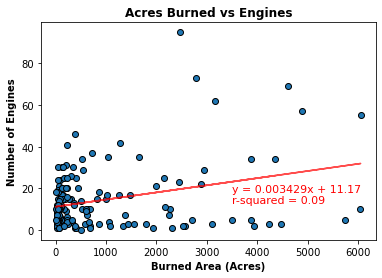

In [13]:
# Define x, y values
eng_x_values = area_en.drop(eng_outliers.index)
eng_y_values = engines.drop(eng_outliers.index)

# Calculate the correlation
eng_correlation = round(st.pearsonr(eng_x_values, eng_y_values)[0],2)
print(f"The correlation between burned area (acres) and number of eng is {eng_correlation}")

# Calculate linear regression values
(eng_slope, eng_intercept, eng_rvalue, eng_pvalue, eng_stderr) = st.linregress(eng_x_values, eng_y_values)

# Calculate r-squared
eng_r_squared = round(eng_rvalue**2,2)
print(f"The r-squared is: {eng_r_squared}")

# y = mx + b
eng_regress_values = eng_x_values * eng_slope + eng_intercept
eng_line_eq = "y = " + str(round(eng_slope,6)) + "x + " + str(round(eng_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(eng_x_values, eng_y_values, edgecolors='black')
plt.plot(eng_x_values, eng_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(eng_line_eq,(3500,18), fontsize=11, color="red")
plt.annotate(f'r-squared = {eng_r_squared}', (3500,13), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Acres Burned vs Engines', fontweight='bold')
plt.xlabel('Burned Area (Acres)', fontweight='bold')
plt.ylabel('Number of Engines', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('../Images/sized_eng.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

#### Resources: Water Tenders

In [14]:
#Discover wheather water tenders has relation to area burned
water = water_df['WaterTenders']
area_wt = water_df['AcresBurned']

# Calculate the IQR and quantitatively
water_quartiles = area_wt.quantile([0.25,0.5,0.75])
water_lowerq = water_quartiles[0.25]
water_upperq = water_quartiles[0.75]
water_mean = area_en.mean()
water_iqr = water_upperq-water_lowerq    
water_lower_bound = water_lowerq - (1.5*water_iqr)
water_upper_bound = water_upperq + (1.5*water_iqr)

# Determine outliers using upper and lower bounds
water_outliers = area_wt.loc[(area_wt < water_lower_bound) | (area_wt > water_upper_bound)]

# Print out the result
print(f'Area burned outliers based on Water Tenders involved')
print(f"Final burned area (arces) below {round(water_lower_bound,2)} could be outliers.")
print(f"Final burned area (arces) above {round(water_upper_bound,2)} could be outliers.")
print(f"Average burned area is: {round(water_mean,2)}")
print(f"Number of outliers is: {water_outliers.count()}")

Area burned outliers based on Water Tenders involved
Final burned area (arces) below -3844.75 could be outliers.
Final burned area (arces) above 6659.25 could be outliers.
Average burned area is: 5882.66
Number of outliers is: 21


The correlation between burned area (acres) and number of water is 0.1
The r-squared is: 0.01


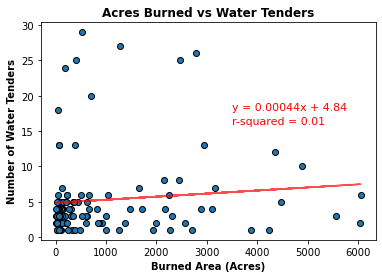

In [15]:
# Define x, y values
water_x_values = area_wt.drop(water_outliers.index)
water_y_values = water.drop(water_outliers.index)

# Calculate the correlation
water_correlation = round(st.pearsonr(water_x_values, water_y_values)[0],2)
print(f"The correlation between burned area (acres) and number of water is {water_correlation}")

# Calculate linear regression values
(water_slope, water_intercept, water_rvalue, water_pvalue, water_stderr) = st.linregress(water_x_values, water_y_values)

# Calculate r-squared
water_r_squared = round(water_rvalue**2,2)
print(f"The r-squared is: {water_r_squared}")

# y = mx + b
water_regress_values = water_x_values * water_slope + water_intercept
water_line_eq = "y = " + str(round(water_slope,5)) + "x + " + str(round(water_intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(water_x_values, water_y_values, edgecolors='black')
plt.plot(water_x_values, water_regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(water_line_eq,(3500,18), fontsize=11, color="red")
plt.annotate(f'r-squared = {water_r_squared}', (3500,16), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Acres Burned vs Water Tenders', fontweight='bold')
plt.xlabel('Burned Area (Acres)', fontweight='bold')
plt.ylabel('Number of Water Tenders', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('../Images/sized_water.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()